In [1]:
import numpy as np

In [16]:
n_nodes = 4
nodes = list(range(n_nodes))
M = np.random.rand(n_nodes, n_nodes)

In [17]:
def make_edges(M):
    edges = []
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            edges.append((i, j, M[i, j]))
    return edges

In [18]:
make_edges(M)

[(0, 0, 0.1799368922511826),
 (0, 1, 0.9554606581571167),
 (0, 2, 0.9297116834059783),
 (0, 3, 0.7694838873684321),
 (1, 0, 0.6860663211503091),
 (1, 1, 0.6747779322829854),
 (1, 2, 0.8336491393478077),
 (1, 3, 0.04398038178027408),
 (2, 0, 0.5274796736830434),
 (2, 1, 0.2501232287006241),
 (2, 2, 0.6889332552844285),
 (2, 3, 0.7733676055131793),
 (3, 0, 0.573561568037269),
 (3, 1, 0.29636532614855804),
 (3, 2, 0.45241875374700646),
 (3, 3, 0.9686313438536825)]

In [20]:
def make_graph(G, nodes, M):
    G.add_nodes_from(nodes)
    G.add_edges_from(make_edges(M))

    return G

In [21]:
G = nx.MultiDiGraph()
G = make_graph(G, nodes, M)


In [26]:
G.number_of_edges()

16

In [39]:
hist, bin_edges = np.histogram(M.flatten(), bins=5)
print(hist)
print(bin_edges)

[2 2 3 5 4]
[0.04398038 0.22891057 0.41384077 0.59877096 0.78370115 0.96863134]


/tmp/ipykernel_87489/1398231561.py:31: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


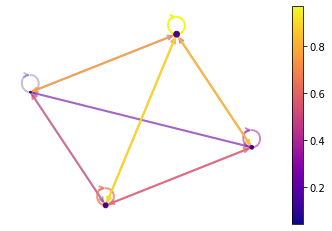

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
n_edges = G.number_of_edges()
edge_colors = range(2, n_edges+2)
edge_alphas = [(5 + i) / (n_edges + 4) for i in range(n_edges)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(n_edges):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(bin_edges)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()